
# <p align = 'center'>Importance of Feature Scaling</p>

Feature scaling through standardization (or **Z-score normalization**)
can be an important preprocessing step for many machine learning
algorithms. Standardization involves rescaling the features such
that they have the properties of a standard normal distribution
with a mean of zero and a standard deviation of one.

While many algorithms (such as `SVM, K-nearest neighbors, and logistic
regression`) require features to be normalized, intuitively we can
think of `Principle Component Analysis` (PCA) as being a prime example
of when normalization is important. In PCA we are interested in the
components that maximize the variance. If one component (e.g. human
height) varies less than another (e.g. weight) because of their
respective scales (meters vs. kilos), PCA might determine that the
direction of maximal variance more closely corresponds with the
'weight' axis, if those features are not scaled. As a change in
height of one meter can be considered much more important than the
change in weight of one kilogram, this is clearly incorrect.

To illustrate this, class: `PCA <sklearn.decomposition.PCA>`
is performed comparing the use of data with
class: `StandardScaler <sklearn.preprocessing.StandardScaler>` applied,
to unscaled data. The results are visualized and a clear difference noted.
The 1st principal component in the unscaled set can be seen. It can be seen
that feature #13 dominates the direction, being a whole two orders of
magnitude above the other features. This is contrasted when observing
the principal component for the scaled version of the data. In the scaled
version, the orders of magnitude are roughly the same across all the features.

The dataset used is the Wine Dataset available at UCI. This dataset
has continuous features that are heterogeneous in scale due to differing
properties that they measure (i.e. alcohol content and malic acid).

The transformed data is then used to train a naive Bayes classifier, and a
clear difference in prediction accuracies is observed wherein the dataset
which is scaled before PCA vastly outperforms the unscaled version.


In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_wine
from sklearn.pipeline import make_pipeline

import warnings
warnings.filterwarnings("ignore")

RANDOM_STATE = 42
FIG_SIZE = (10, 7)

In [2]:
features, target = load_wine(return_X_y=True)
winedata = pd.DataFrame(features, target)
winedata.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
0,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
0,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
0,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
0,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [3]:
# Make a train/test split using 30% test size
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.30, random_state=RANDOM_STATE)

In [15]:
# Fit to data and predict using pipelined GNB and PCA
unscaled_clf = make_pipeline(PCA(n_components=2), GaussianNB())
unscaled_clf.fit(X_train, y_train)
pred_train = unscaled_clf.predict(X_train)
pred_test = unscaled_clf.predict(X_test)

In [19]:
# Show prediction accuracies in scaled and unscaled data.
print("Training accuracy for the normal test dataset with PCA - ")
print(f"{accuracy_score(y_train, pred_train):.2%}")
print("Prediction/testing accuracy for the normal test dataset with PCA - ")
print(f"{accuracy_score(y_test, pred_test):.2%}")

Training accuracy for the normal test dataset with PCA
74.19%
Prediction/testing accuracy for the normal test dataset with PCA
81.48%


In [20]:
# Fit to data and predict using pipelined scaling, GNB and PCA
std_clf = make_pipeline(StandardScaler(), PCA(n_components=2), GaussianNB())
std_clf.fit(X_train, y_train)
pred_train_std = std_clf.predict(X_train)
pred_test_std = std_clf.predict(X_test)

In [22]:
print("Training accuracy for the normal test dataset with PCA - ")
print(f"{accuracy_score(y_train, pred_train_std):.2%}")
print("Prediction accuracy for the standardized test dataset with PCA")
print(f"{accuracy_score(y_test, pred_test_std):.2%}")

Training accuracy for the normal test dataset with PCA - 
95.97%
Prediction accuracy for the standardized test dataset with PCA
98.15%


#### Note - The accuracy increased after Standardizing the dataset

In [32]:
# Extract PCA from pipeline
pca = unscaled_clf.named_steps["pca"]
pca_std = std_clf.named_steps["pca"]

In [45]:
pca_data = pd.DataFrame(pca.components_)
pca_data.iloc[:1]

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.001763,-0.000836,0.000155,-0.005311,0.020166,0.001024,0.001532,-0.000112,0.000631,0.002326,0.000154,0.000743,0.999776


In [24]:
# Show first principal components
print(f"\nPC 1 without scaling:\n{pca.components_[0]}")
print(f"\nPC 1 with scaling:\n{pca_std.components_[0]}")


PC 1 without scaling:
[ 1.76342917e-03 -8.35544737e-04  1.54623496e-04 -5.31136096e-03
  2.01663336e-02  1.02440667e-03  1.53155502e-03 -1.11663562e-04
  6.31071580e-04  2.32645551e-03  1.53606718e-04  7.43176482e-04
  9.99775716e-01]

PC 1 with scaling:
[ 0.13443023 -0.25680248 -0.0113463  -0.23405337  0.15840049  0.39194918
  0.41607649 -0.27871336  0.33129255 -0.11383282  0.29726413  0.38054255
  0.27507157]


In [52]:
# Use PCA without and with scale on X_train data for visualization.
X_train_transformed = pca.transform(X_train)

scaler = std_clf.named_steps["standardscaler"]
scaled_X_train = scaler.transform(X_train)
X_train_std_transformed = pca_std.transform(scaled_X_train)

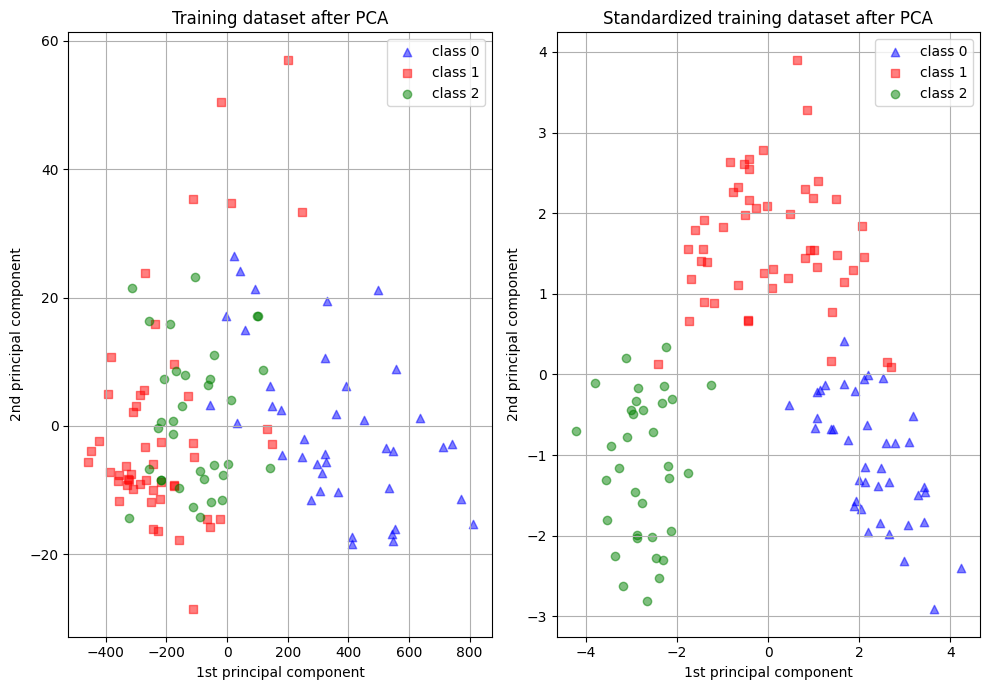

In [31]:
# visualize standardized vs. untouched dataset with PCA performed
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=FIG_SIZE)

target_classes = range(0, 3)
colors = ("blue", "red", "green")
markers = ("^", "s", "o")

for target_class, color, marker in zip(target_classes, colors, markers): # in zip dimension of all the attributes should be same
    ax1.scatter(
        x=X_train_transformed[y_train == target_class, 0],
        y=X_train_transformed[y_train == target_class, 1],
        color=color,
        label=f"class {target_class}",
        alpha=0.5,
        marker=marker,
    )

    ax2.scatter(
        x=X_train_std_transformed[y_train == target_class, 0],
        y=X_train_std_transformed[y_train == target_class, 1],
        color=color,
        label=f"class {target_class}",
        alpha=0.5,
        marker=marker,
    )

ax1.set_title("Training dataset after PCA")
ax2.set_title("Standardized training dataset after PCA")

for ax in (ax1, ax2):
    ax.set_xlabel("1st principal component")
    ax.set_ylabel("2nd principal component")
    ax.legend(loc="upper right")
    ax.grid()

plt.tight_layout()

plt.show()